## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [16]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """
    Code Here
    建立你的神經網路
    """

    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [25]:
LEARNING_RATE = 1e-3
EPOCHS = 25 
BATCH_SIZE = 1024 

In [26]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.5,0.75]
redice_lr_patient = [5, 10]

In [27]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 31s 615us/step - loss: 1.3076 - acc: 0.5448 - val_loss: 1.4952 - val_acc: 0.4721
Epoch 12/25
50000/50000 [==============================] - 27s 536us/step - loss: 1.2841 - acc: 0.5527 - val_loss: 1.4815 - val_acc: 0.4754
Epoch 13/25
50000/50000 [==============================] - 28s 560us/step - loss: 1.2626 - acc: 0.5597 - val_loss: 1.4815 - val_acc: 0.4773
Epoch 14/25
50000/50000 [==============================] - 30s 610us/step - loss: 1.2407 - acc: 0.5681 - val_loss: 1.4781 - val_acc: 0.4791
Epoch 15/25
50000/50000 [==============================] - 32s 630us/step - loss: 1.2196 - acc: 0.5789 - val_loss: 1.4636 - val_acc: 0.4813
Epoch 16/25
50000/50000 [==============================] - 20s 390us/step - loss: 1.1979 - acc: 0.5861 - val_loss: 1.4820 - val_acc: 0.4789
Epoch 17/25
50000/50000 [==============================] - 20s 409us/step - loss: 1.1792 - acc: 0.5934 - val_loss: 1.4654 - val_acc: 0.4829
Epoch 18/25
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 38s 753us/step - loss: 2.2095 - acc: 0.2719 - val_loss: 2.1414 - val_acc: 0.3065
Epoch 2/25
50000/50000 [==============================] - 25s 498us/step - loss: 1.7530 - acc: 0.3901 - val_loss: 1.8740 - val_acc: 0.3704
Epoch 3/25
50000/50000 [==============================] - 21s 414us/step - loss: 1.6297 - acc: 0.4281 - val_loss: 1.7099 - val_acc: 0.4089
Epoch 4/25
50000/50000 [==============================] - 21s 414us/step - loss: 1.5549 - acc: 0.4553 - val_loss: 1.6553 - val_acc: 0.4281
Epoch 5/25
50000/50000 [==============================] - 20s 407us/step - loss: 1.5003 - acc: 0.4745 - val_loss: 1.5884 - val_acc: 0.4451
Epoch 6/25
50000/50000 [==============================] - 19s 388us/step - loss: 1.4569 - acc: 0.4908 - val_loss: 1.5785 - val_acc: 0.4466
Epoch 7/25
50000/50000 [==============================] - 21s 423us/step - loss: 1.4216 - acc: 0.5038 - val_loss: 1.

50000/50000 [==============================] - 24s 476us/step - loss: 0.5007 - acc: 0.8482 - val_loss: 1.6228 - val_acc: 0.4949
Epoch 23/25
50000/50000 [==============================] - 24s 471us/step - loss: 0.4809 - acc: 0.8545 - val_loss: 1.5754 - val_acc: 0.5111

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 24/25
50000/50000 [==============================] - 23s 457us/step - loss: 0.4349 - acc: 0.8783 - val_loss: 1.5607 - val_acc: 0.5227
Epoch 25/25
50000/50000 [==============================] - 20s 401us/step - loss: 0.4193 - acc: 0.8847 - val_loss: 1.5615 - val_acc: 0.5234
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)        

50000/50000 [==============================] - 45s 903us/step - loss: 1.2143 - acc: 0.5805 - val_loss: 1.5186 - val_acc: 0.4735
Epoch 9/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1859 - acc: 0.5912 - val_loss: 1.4800 - val_acc: 0.4807
Epoch 10/25
50000/50000 [==============================] - 39s 785us/step - loss: 1.1544 - acc: 0.6030 - val_loss: 1.4574 - val_acc: 0.4877
Epoch 11/25
50000/50000 [==============================] - 43s 859us/step - loss: 1.1287 - acc: 0.6124 - val_loss: 1.4466 - val_acc: 0.4951
Epoch 12/25
50000/50000 [==============================] - 35s 696us/step - loss: 1.1073 - acc: 0.6211 - val_loss: 1.4342 - val_acc: 0.4973
Epoch 13/25
50000/50000 [==============================] - 36s 723us/step - loss: 1.0845 - acc: 0.6286 - val_loss: 1.4190 - val_acc: 0.5018
Epoch 14/25
50000/50000 [==============================] - 27s 535us/step - loss: 1.0598 - acc: 0.6381 - val_loss: 1.4248 - val_acc: 0.5064
Epoch 15/25
50000/50000 [==========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 42s 836us/step - loss: 1.8453 - acc: 0.3643 - val_loss: 2.5906 - val_acc: 0.2689
Epoch 2/25
50000/50000 [==============================] - 24s 485us/step - loss: 1.5271 - acc: 0.4586 - val_loss: 2.0548 - val_acc: 0.3067
Epoch 3/25
50000/50000 [==============================] - 22s 435us/step - loss: 1.4188 - acc: 0.4960 - val_loss: 2.1088 - val_acc: 0.3234
Epoch 4/25
50000/50000 [==============================] - 21s 426us/step - loss: 1.3374 - acc: 0.5274 - val_loss: 2.0235 - val_acc: 0.3203
Epoch 5/25
50000/50000 [==============================] - 22s 449us/step - loss: 1.2720 - acc: 0.5506 - val_loss: 1.6927 - val_acc: 0.4117
Epoch 6/25
50000/50000 [==============================] - 25s 498us/step - loss: 1.2167 - acc: 0.5702 - val_loss: 1.6072 - val_acc: 0.4418
Epoch 7/25
50000/50000 [==============================] - 25s 495us/step - loss: 1.1635 - acc: 0.5895 - val_loss: 1.

Epoch 22/25
50000/50000 [==============================] - 25s 501us/step - loss: 0.8866 - acc: 0.7016 - val_loss: 1.5106 - val_acc: 0.4789
Epoch 23/25
50000/50000 [==============================] - 23s 458us/step - loss: 0.8658 - acc: 0.7092 - val_loss: 1.5222 - val_acc: 0.4828
Epoch 24/25
50000/50000 [==============================] - 21s 422us/step - loss: 0.8488 - acc: 0.7156 - val_loss: 1.5532 - val_acc: 0.4808
Epoch 25/25
50000/50000 [==============================] - 22s 450us/step - loss: 0.8277 - acc: 0.7237 - val_loss: 1.5350 - val_acc: 0.4862

Epoch 00025: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Numbers of exp: 10, reduce_factor: 0.75, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2

Epoch 8/25
50000/50000 [==============================] - 21s 429us/step - loss: 1.4311 - acc: 0.5001 - val_loss: 1.5772 - val_acc: 0.4431
Epoch 9/25
50000/50000 [==============================] - 23s 451us/step - loss: 1.3981 - acc: 0.5127 - val_loss: 1.5596 - val_acc: 0.4487
Epoch 10/25
50000/50000 [==============================] - 29s 589us/step - loss: 1.3696 - acc: 0.5229 - val_loss: 1.5488 - val_acc: 0.4525
Epoch 11/25
50000/50000 [==============================] - 35s 704us/step - loss: 1.3430 - acc: 0.5317 - val_loss: 1.5359 - val_acc: 0.4594
Epoch 12/25
50000/50000 [==============================] - 24s 482us/step - loss: 1.3187 - acc: 0.5410 - val_loss: 1.5317 - val_acc: 0.4649
Epoch 13/25
50000/50000 [==============================] - 23s 457us/step - loss: 1.2956 - acc: 0.5483 - val_loss: 1.5211 - val_acc: 0.4701
Epoch 14/25
50000/50000 [==============================] - 23s 453us/step - loss: 1.2732 - acc: 0.5589 - val_loss: 1.5252 - val_acc: 0.4651
Epoch 15/25
50000/5000

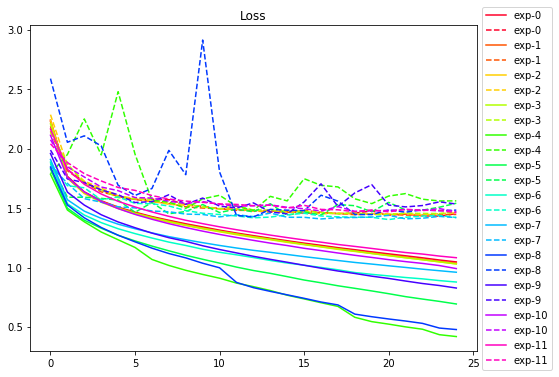

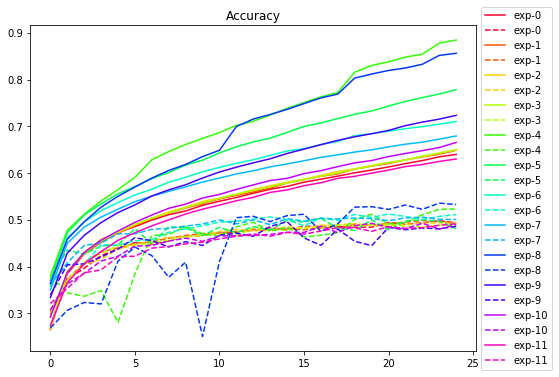

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()